In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
%matplotlib inline

sns.set(style="darkgrid")

In [2]:
df = pd.read_csv("cars_sampled.csv", encoding='latin-1')
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


# 1.Find out if following variables are significant or insignificant and need to be dropped.

# 2. Drop insignificant variables from dataframe ‘cars’.

### 1. Seller

In [3]:
df.seller.value_counts()

private       49999
commercial        2
Name: seller, dtype: int64

In [4]:
df = df.drop("seller",axis=1)

###  2. Offer Type

In [5]:
df.offerType.value_counts()

offer      49998
request        3
Name: offerType, dtype: int64

In [6]:
df = df.drop("offerType",axis=1)

###  3. AB Test

In [7]:
df.abtest.value_counts()

test       25869
control    24132
Name: abtest, dtype: int64

In [8]:
abtest_stats = df.groupby("abtest").agg({"price" : ["mean","var","count"]})
abtest_stats

price                     
                mean           var  count
abtest                                   
control  6311.930424  4.600660e+09  24132
test     6791.152654  9.943525e+09  25869

In [9]:
import scipy.stats as st

z_abtest= (abtest_stats[('price','mean')][1] - abtest_stats[('price','mean')][0]) / np.sqrt((abtest_stats[('price','var')][1]/abtest_stats[('price','count')][1]) + (abtest_stats[('price','var')][0]/abtest_stats[('price','count')][0]))

print(f"Probability of std-normal: {st.norm.sf(abs(z_abtest))}")

Probability of std-normal: 0.2637047048274638


In [10]:
df = df.drop("abtest", axis=1)

### 4. Gearbox

In [11]:
df.gearbox.value_counts()

manual       36732
automatic    10445
Name: gearbox, dtype: int64

In [12]:
gearbox_stats = df.groupby("gearbox").agg({"price" : ["mean","var","count"]})
gearbox_stats

price                     
                   mean           var  count
gearbox                                     
automatic  10668.584586  2.130006e+08  10445
manual      5267.382282  6.974181e+09  36732

In [13]:
z_gearbox = (gearbox_stats[('price','mean')][1] - gearbox_stats[('price','mean')][0]) / np.sqrt((gearbox_stats[('price','var')][1]/gearbox_stats[('price','count')][1]) + (gearbox_stats[('price','var')][0]/gearbox_stats[('price','count')][0]))

print(f"Probability of std-normal: {st.norm.sf(abs(z_gearbox))}")

Probability of std-normal: 2.5005546480844033e-32


### 5. Brand

In [14]:
brand_count = df.brand.value_counts()
brand_count_mean = brand_count.mean()
selected_brands = list(brand_count[brand_count > brand_count_mean].index)[:10]
selected_brands

['volkswagen',
 'bmw',
 'opel',
 'mercedes_benz',
 'audi',
 'ford',
 'renault',
 'peugeot']

In [15]:
df= df[df["brand"].isin(selected_brands)]
df["brand"]=df.brand.apply(lambda x : selected_brands.index(x))

<AxesSubplot:xlabel='brand', ylabel='price'>

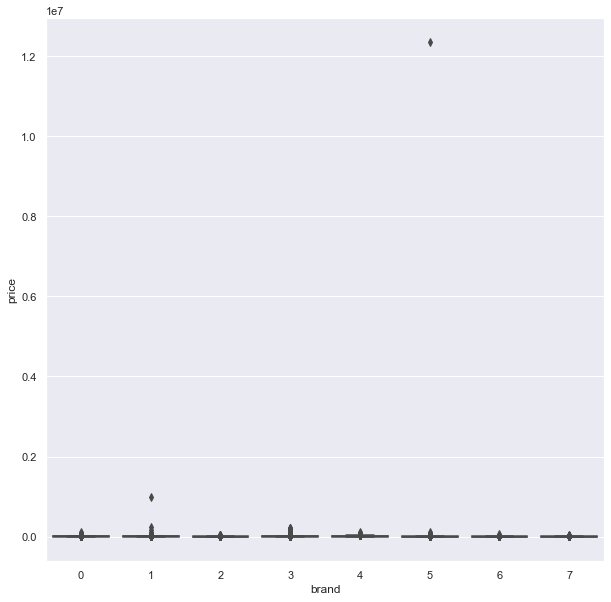

In [16]:
plt.figure(figsize=(10,10))
sns.boxplot(x="brand",y="price",data= df)

### 6. Not Repaired Damage

In [17]:
df.notRepairedDamage.value_counts()

no     26829
yes     3795
Name: notRepairedDamage, dtype: int64

In [18]:
df["notRepairedDamage"] = df.notRepairedDamage.apply(lambda x : 0 if x =="no" else (1 if x =="yes" else np.nan))
df= df[~df.notRepairedDamage.isna()]

In [19]:
notRepairedDamage_stats=df.groupby("notRepairedDamage").agg({"price":["mean","var","count"]})
notRepairedDamage_stats

price                     
                          mean           var  count
notRepairedDamage                                  
0.0                7350.865742  5.745190e+09  26829
1.0                2105.657708  1.205598e+07   3795

In [20]:
z_notRepairedDamage = (notRepairedDamage_stats[('price','mean')][1] - notRepairedDamage_stats[('price','mean')][0]) / np.sqrt((notRepairedDamage_stats[('price','var')][1]/notRepairedDamage_stats[('price','count')][1]) + (notRepairedDamage_stats[('price','var')][0]/notRepairedDamage_stats[('price','count')][0]))

print(f"Probability of std-normal: {st.norm.sf(abs(z_notRepairedDamage))}")

Probability of std-normal: 1.1369014708952156e-29


### 7. Vehicle Type and Fuel Type

In [21]:
df["vehicleType"] = df.vehicleType.fillna(df.vehicleType.value_counts().index[0])

In [22]:
df["fuelType"] = df.fuelType.fillna(df.fuelType.value_counts().index[0])

In [23]:
cols = ['dateCrawled', 'name', 'dateCreated', 'lastSeen']
df.drop(columns=cols, inplace=True)
df.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
5,988,limousine,1995,manual,90,passat,150000,2,petrol,0,0.0,26826
7,1399,coupe,1997,manual,136,clk,150000,11,petrol,3,0.0,13353
8,4680,station wagon,2005,manual,122,vectra,150000,12,petrol,2,0.0,28307
10,1870,limousine,2001,manual,82,a_klasse,150000,1,petrol,3,0.0,26835
11,2500,coupe,2001,manual,105,astra,125000,4,petrol,2,0.0,31174


# Q3. Final Correlation and Transformation

<AxesSubplot:>

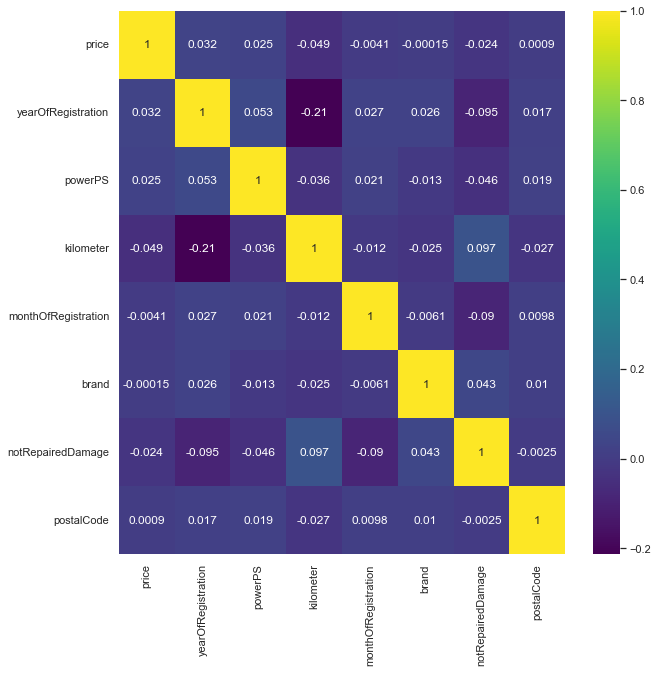

In [24]:
plt.figure(figsize=(10,10))

sns.heatmap(df.corr(),cmap = 'viridis',annot=True)

In [25]:
model_input_df = pd.concat([df.drop(["fuelType", "vehicleType", "gearbox", "model"], axis=1), 
                            pd.get_dummies(df.fuelType, prefix="fuelType"),
                            pd.get_dummies(df.vehicleType, prefix="vehicleType"), 
                            pd.get_dummies(df.fuelType, prefix="model")], axis=1) 
model_input_df = model_input_df[model_input_df["price"]>0]

# Q4. Training Model

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error

In [27]:
train_X, test_x, train_y, test_y = train_test_split(model_input_df.drop("price", axis=1).to_numpy(), np.log(model_input_df.price.to_numpy()), test_size=0.3, random_state=42)

In [28]:
sc = StandardScaler()
train_X = sc.fit_transform(train_X) 
test_x  = sc.fit_transform (test_x)

In [29]:
regressor= Ridge(alpha=0.5)
regressor.fit(train_X,train_y)
preds= regressor.predict(test_x)
print("R2 score of train =", round(regressor.score(train_X, train_y), 2))
print("R2 score of test  =", round(regressor.score(test_x, test_y), 2))
print("rmse =", round(mean_squared_error(test_y,preds),2))

R2 score of train = 0.49
R2 score of test  = 0.53
rmse = 0.73
